In [36]:
#! /usr/bin/env python
# Test photometry
# Simple plots eg. colour-colour
# Match and compare deep data to wide, per galaxy

!jupyter nbconvert --to script TestPhotometry_deep.ipynb

from __future__ import print_function
import os
import numpy as np
#from read_psf_cats import read_data, band_combinations
import fitsio
import treecorr
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
from astropy.io import fits
import h5py as h
from astropy.table import Table,join

[NbConvertApp] Converting notebook TestPhotometry_deep.ipynb to script
[NbConvertApp] Writing 6956 bytes to TestPhotometry_deep.py


In [2]:
#read in Erin's catalogue
cosmosfile='/global/homes/a/aamon/DES/DEStests/DEEP/MOFcats/SN-C3/run-vd03-SN-C3_C01_r3688p01.fits'

data = fits.open(cosmosfile) 
data.info() 
print(data.info)
deep=Table(data[1].data)
print(min(deep['ra']),max(deep['ra']))

cols = data[1].columns
print(cols)

print(deep['bdf_mag'][:,2]) #ugriz YJHKs
#print(len(deep['mag_auto']))

deepra=deep['ra']
deepdec=deep['dec']
deepu=deep['bdf_mag'][:,0]
deepr=deep['bdf_mag'][:,2]
deepi=deep['bdf_mag'][:,3]

deepra=deepra[deepr>0]
deepdec=deepdec[deepr>0]
deepu=deepu[deepr>0]
deepi=deepi[deepr>0]
deepr=deepr[deepr>0]
print(len(deepra))
deepra=deepra[deepi>0]
deepdec=deepdec[deepi>0]
deepu=deepu[deepi>0]
deepr=deepr[deepi>0]
deepi=deepi[deepi>0]
print(len(deepra))

#print(deep['id'])
#print(deep['ra'])

#ASSUMING MAGS ARE UGRI YJHKS

Filename: /global/homes/a/aamon/DES/DEStests/DEEP/MOFcats/SN-C3/run-vd03-SN-C3_C01_r3688p01.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1  model_fits    1 BinTableHDU     74   14324R x 31C   [K, D, D, K, J, 11A, E, 2D, D, 9J, 9D, 9D, 9D, 9D, J, J, D, 15D, 15D, 225D, 2D, 4D, D, D, D, 9D, 9D, 81D, 9D, D, D]   
  2  epochs_data    1 BinTableHDU     17   190953R x 4C   [K, I, J, 18D]   
<bound method HDUList.info of [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x2aaad68dcc90>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x2aaad68ef090>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x2aaad68ef550>]>
52.1259465115 52.4672947686
ColDefs(
    name = 'id'; format = 'K'
    name = 'ra'; format = 'D'
    name = 'dec'; format = 'D'
    name = 'fof_id'; format = 'K'
    name = 'flags'; format = 'J'
    name = 'flagstr'; format = '11A'
    name = 'masked_frac'; format = 'E'
    name = 'psf_g'; format = '2D'
    

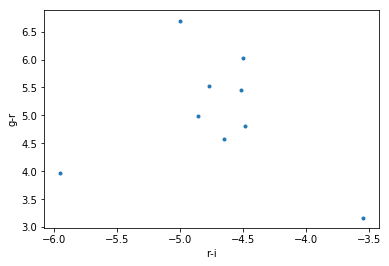

In [3]:
#colour-colour
plt.scatter(deep['bdf_mag'][2]-deep['bdf_mag'][3],deep['bdf_mag'][1]-deep['bdf_mag'][2], marker='.') #,markersize=10 )
plt.xlabel('r-i')
plt.ylabel('g-r')

In [4]:
#read in gold 
catname = '/global/cscratch1/sd/troxel/cats_des_y3/Y3_mastercat_v2_6_20_18.h5'

f = h.File(catname,'r')
print(f['catalog'].keys())
print(f['catalog/gold'].keys())
print(f['catalog/gold/coadd_object_id'])

#FLAGS_GOLD  If you are using SExtractor quantities, you should add (FLAGS_GOLD & 1111000) = 0; and (FLAGS_BADREGIONS & 01) = 0

#gflag = np.array(f['catalog/gold/flags_gold'])
#print(gflag)

ra = np.array(f['catalog/gold/ra'])#[star_mask] 
dec = np.array(f['catalog/gold/dec'])#[star_mask]
print(len(ra))

"""#cosmos only
ra=ra[(ra<53)] # & (ra>49)]
#dec=dec[cosmosonly]
print(len(ra))
ra=ra[(ra>51)]
print(len(ra))"""

zeropt=30
r = zeropt- 2.5*np.log10(np.array(f['catalog/gold/sof_cm_flux_corrected_r']))#[star_mask]
i = zeropt- 2.5*np.log10(np.array(f['catalog/gold/sof_cm_flux_corrected_i']))#[star_mask]
z = zeropt- 2.5*np.log10(np.array(f['catalog/gold/sof_cm_flux_corrected_z']))#[star_mask]

print(len(r))

"""cosmosonly=np.where(  (ra<max(deep['ra'])) & (ra>min(deep['ra']))
               &  (dec<max(deep['dec'])) & (dec>min(deep['dec']))   )
i=i[cosmosonly]
z=z[cosmosonly]
r=r[cosmosonly]
print(len(r))"""
print(min(ra)) 
print(max(ra))
ra=ra[np.where((i<30) & (i>0))]
dec=dec[np.where((i<30)& (i>0))]
z=z[np.where((i<30)& (i>0))]
r=r[np.where((i<30)& (i>0))]
i=i[np.where((i<30)& (i>0))]
print(len(ra))

ra[ra > 180] -= 360

gold=np.column_stack((ra,dec,r,i,z))
print(gold)
#gold = gold[gold[:,0].argsort()][:1000000]

gold=gold[np.where(ra>min(deep['ra']))]
#,max(deep['ra'])

print(gold)
print(len(gold))
goldra=gold[:,0]
golddec=gold[:,1]
goldr=gold[:,2]
goldi=gold[:,3]
goldz=gold[:,4]


[u'metacal', u'gold', u'bpz', u'dnf', u'redmagic', u'redmapper']
[u'a_sed_sfd98_g', u'a_sed_sfd98_i', u'a_sed_sfd98_r', u'a_sed_sfd98_z', u'coadd_object_id', u'dec', u'delta_mag_chrom_g', u'delta_mag_chrom_i', u'delta_mag_chrom_r', u'delta_mag_chrom_z', u'delta_mag_y4_g', u'delta_mag_y4_i', u'delta_mag_y4_r', u'delta_mag_y4_z', u'ebv_sfd98', u'flags', u'flags_badregions', u'flags_footprint', u'flags_foreground', u'flags_gold', u'flags_phot', u'hpix_16384', u'n_images_g', u'n_images_i', u'n_images_r', u'n_images_z', u'ra', u'sextractor_flags_g', u'sextractor_flags_i', u'sextractor_flags_r', u'sextractor_flags_z', u'sof_cm_flux_corrected_g', u'sof_cm_flux_corrected_i', u'sof_cm_flux_corrected_r', u'sof_cm_flux_corrected_z', u'sof_cm_flux_err_g', u'sof_cm_flux_err_i', u'sof_cm_flux_err_r', u'sof_cm_flux_err_z', u'sof_cm_mag_corrected_g', u'sof_cm_mag_corrected_i', u'sof_cm_mag_corrected_r', u'sof_cm_mag_corrected_z', u'sof_cm_mag_err_g', u'sof_cm_mag_err_i', u'sof_cm_mag_err_r', u'sof_cm_

/global/u2/a/aamon/.conda/envs/DESenv/lib/python2.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log10
/global/u2/a/aamon/.conda/envs/DESenv/lib/python2.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in log10
/global/u2/a/aamon/.conda/envs/DESenv/lib/python2.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log10
/global/u2/a/aamon/.conda/envs/DESenv/lib/python2.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in log10
/global/u2/a/aamon/.conda/envs/DESenv/lib/python2.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log10
/global/u2/a/aamon/.conda/envs/DESenv/lib/python2.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in log10


399263026
1.52399081799e-06
359.999999531


/global/u2/a/aamon/.conda/envs/DESenv/lib/python2.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in less
/global/u2/a/aamon/.conda/envs/DESenv/lib/python2.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in greater
/global/u2/a/aamon/.conda/envs/DESenv/lib/python2.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in less
/global/u2/a/aamon/.conda/envs/DESenv/lib/python2.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in greater
/global/u2/a/aamon/.conda/envs/DESenv/lib/python2.7/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less
/global/u2/a/aamon/.conda/envs/DESenv/lib/python2.7/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in greater
/global/u2/a/aamon/.conda/envs/DESenv/lib/python2.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in le

386507259
[[  4.50014413e+01   3.70761157e-03   2.19896551e+01   2.16150501e+01
    2.12456644e+01]
 [  4.49972535e+01   1.04404433e-02   2.18234535e+01   2.06837332e+01
    2.01906007e+01]
 [  4.49971163e+01   9.44756779e-03   2.30809067e+01   2.32646955e+01
    2.25322793e+01]
 ..., 
 [ -4.36099674e+01  -1.18839131e+00   2.49294658e+01   2.29473335e+01
    2.25773147e+01]
 [ -4.36099435e+01  -1.18586508e+00   2.62731173e+01   2.34795196e+01
    2.30166985e+01]
 [ -4.36069619e+01  -1.18399895e+00   2.05802013e+01   2.04590621e+01
    2.03480711e+01]]
[[ 89.99772585 -41.80689499  22.61621892  21.60077925  21.16378588]
 [ 90.00194925 -41.80401195  23.65083783  22.78437632  22.50782518]
 [ 90.00101578 -41.80386767  22.71179347  22.66952665  22.38759533]
 ..., 
 [ 93.81784327 -37.59796777  22.63541441  22.30272492  22.29210819]
 [ 93.82235842 -37.59980864  25.76554188  23.12136215  22.49484535]
 [ 93.82618738 -37.59954432  23.85815557  23.52793816  23.7837248 ]]
119695426


In [5]:
#match galaxies by ra and dec

from astropy.coordinates import SkyCoord
from astropy import units as u

goldcat = SkyCoord(ra=goldra*u.degree, dec=golddec*u.degree)  
catalog = SkyCoord(ra=deepra*u.degree, dec=deepdec*u.degree)  
idx, d2d, d3d = catalog.match_to_catalog_sky(goldcat, nthneighbor=1) 

print(goldra[idx])


[ 52.18049819  52.22298942  52.43635611 ...,  52.16240088  52.21186369
  52.304274  ]


119695426
14324
13651
[0d00m00.1902s 0d00m10.9245s 0d00m00.1917s ..., 0d00m09.1424s 0d00m00.1694s
 0d00m04.1117s]
[  0.19017308  10.92449632   0.19169229 ...,   9.14243558   0.16939467
   4.11172678]
      ra     
-------------
52.1805378642
52.4364117585
52.2805617589
 52.164644634
52.1447445346
52.2410897734
52.2242971836
52.2367092019
52.4147602403
52.2765989835
          ...
52.2524327328
52.2308107398
52.2884846696
52.4464589898
52.4556942064
52.3293600315
52.1824787838
52.3422860541
52.1595710472
52.2119046262
52.3045989531
Length = 11944 rows


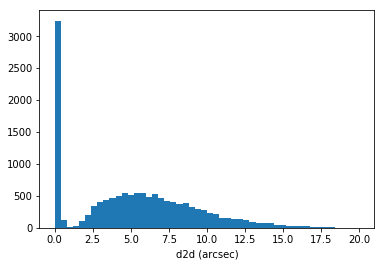

In [6]:
print(len(goldra)) 
print(len(deep['bdf_mag'])) 
print(len(d2d))  
print(d2d)
print(d2d.arcsecond)
plt.hist(d2d.arcsecond, 50, range=(0, 20)) #20 is the max matching range in arcmin
plt.xlabel('d2d (arcsec)')
print(deepra[d2d.arcsecond < 10])

52.1265004557 52.4702336985
52.1286573029 52.4666005786


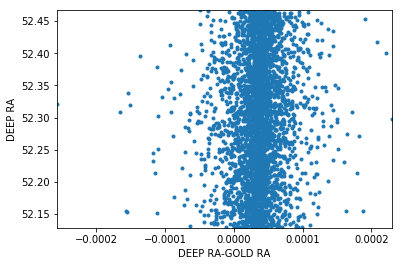

In [34]:
matchlim=1
plt.scatter(deepra[np.where(d2d.arcsecond < matchlim)]-goldra[idx][np.where(d2d.arcsecond < matchlim)],deepra[np.where(d2d.arcsecond < matchlim)], marker='.')
plt.xlabel('DEEP RA-GOLD RA')
plt.ylabel('DEEP RA')
plt.ticklabel_format(useOffset=False)
#plt.xlim(min(goldra[idx][np.where(d2d < matchlim)]),max(goldra[idx][np.where(d2d < matchlim)]) )
plt.ylim(min(deepra[np.where(d2d.arcsecond < matchlim)]),max(deepra[np.where(d2d.arcsecond < matchlim)]) )
plt.xlim(min(deepra[np.where(d2d.arcsecond < matchlim)]-goldra[idx][np.where(d2d.arcsecond < matchlim)]),max(deepra[np.where(d2d.arcsecond < matchlim)]-goldra[idx][np.where(d2d.arcsecond < matchlim)]) )
print(min(goldra[idx]),max(goldra[idx]) )
print(min(deepra),max(deepra))

percentage matched:  24.7014870705
13651
13651


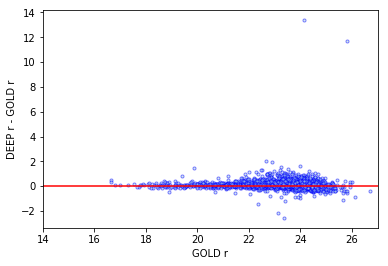

In [35]:
#plot magnitudes
#print(len(goldr[idx][np.where(d2d.arcsecond < matchlim)]))
#print(len(deep['bdf_mag'][np.where(d2d.arcsecond < matchlim)]))

#3372/14324  #gold matches/all deep ~quarter
print("percentage matched: ", float(len(deepr[np.where(d2d.arcsecond < matchlim)]))/float(len(deepr))*100.)
#fit = np.polyfit(goldr[idx][np.where(d2d.arcsecond < matchlim)], deepr[np.where(d2d.arcsecond < matchlim)], 1)
#fit_fn = np.poly1d(fit) 
# fit_fn is now a function which takes in x and returns an estimate for y
print(len(deepr))
print(len(deepr[deepr>0]))
#plt.plot(goldr[idx][np.where(d2d.arcsecond < matchlim)], fit_fn(goldr[idx][np.where(d2d.arcsecond < matchlim)]), '--k')
#x = np.linspace(14, 40, 1000)
#plt.plot(x,x,color='red')
plt.scatter(goldr[idx][np.where(d2d.arcsecond < matchlim)], deepr[np.where(d2d.arcsecond < matchlim)]-goldr[idx][np.where(d2d.arcsecond < matchlim)], marker='.', facecolors='lightblue', color='blue',alpha=0.5)
plt.xlim(14,27)
plt.axhline(y=0, color='red')
#plt.ylim(16,38)
plt.xlabel('GOLD r')
plt.ylabel('DEEP r - GOLD r')

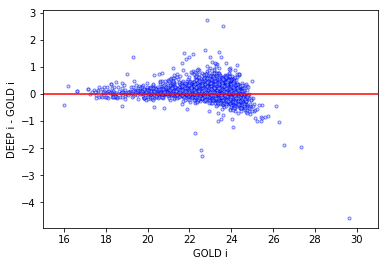

In [28]:
#plot magnitudes

#fit = np.polyfit(goldr[idx][np.where(d2d.arcsecond < matchlim)], deepr[np.where(d2d.arcsecond < matchlim)], 1)
#fit_fn = np.poly1d(fit) 
# fit_fn is now a function which takes in x and returns an estimate for y
#plt.plot(goldr[idx][np.where(d2d.arcsecond < matchlim)], fit_fn(goldr[idx][np.where(d2d.arcsecond < matchlim)]), '--k')
#x = np.linspace(14, 40, 1000)
#plt.plot(x,x,color='red')
plt.scatter(goldi[idx][np.where(d2d.arcsecond < matchlim)], deepi[np.where(d2d.arcsecond < matchlim)]-goldi[idx][np.where(d2d.arcsecond < matchlim)], marker='.', facecolors='lightblue', color='blue',alpha=0.5)
plt.xlim(15,31)
#plt.ylim(15,30)
plt.axhline(y=0, color='red')
plt.xlabel('GOLD i')
plt.ylabel('DEEP i - GOLD i')

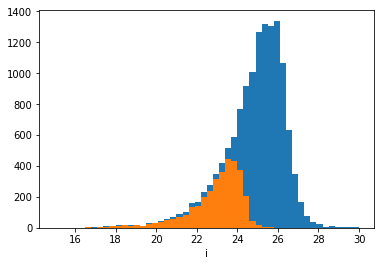

In [29]:
plt.hist(deepi, 50, range=(15, 30))
plt.hist(deepi[np.where(d2d.arcsecond < matchlim)], 50, range=(15, 30))
plt.xlabel('i')

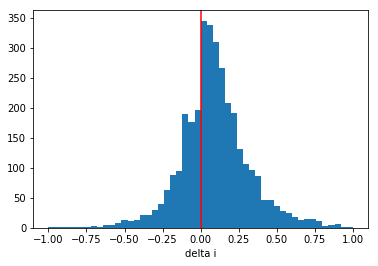

In [30]:
plt.hist(deepi[np.where(d2d.arcsecond < matchlim)]-goldi[idx][np.where(d2d.arcsecond < matchlim)], 50, range=(-1, 1))
plt.axvline(x=0, color='red')
#plt.hist(deepi[np.where(d2d.arcsecond < matchlim)], 50, range=(15, 30))
plt.xlabel('delta i')

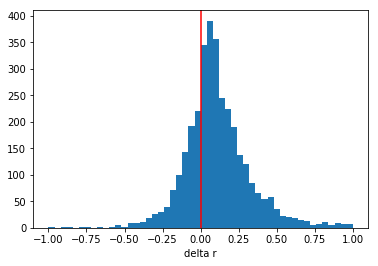

In [31]:
plt.hist(deepr[np.where(d2d.arcsecond < matchlim)]-goldr[idx][np.where(d2d.arcsecond < matchlim)], 50, range=(-1, 1))
plt.axvline(x=0, color='red')
#plt.hist(deepi[np.where(d2d.arcsecond < matchlim)], 50, range=(15, 30))
plt.xlabel('delta r')